In [30]:
from pathlib import Path

import pytest
import xarray as xr
import matplotlib.pyplot as plt

from climate_index_collection.data_loading import VARNAME_MAPPING, load_data_set

In [23]:
def north_atlantic_oscillation(data_set, slp_name="sea-level-pressure"):
    """Calculate the North Atlantic Oscillation (NAO) index station-based using grid points closest to
    Reykjavik (64°9'N, 21°56'W) and Ponta Delgada (37°45'N, 25°40'W).

    Parameters
    ----------
    data_set: xarray.DataSet
        Dataset containing an SLP field.
    slp_name: str
        Name of the Sea-Level Pressure field. Defaults to "sea-level-pressure".

    Returns
    -------
    xarray.DataArray
        Time series containing the NAO index.

    """
    slp = data_set[slp_name]

    slp_northern_station = slp.sel(lat=64, lon=338, method="nearest")
    slp_southern_station = slp.sel(lat=38, lon=334, method="nearest")

    slp_northern_station_norm = (slp_northern_station - slp_northern_station.mean("time")) / slp_northern_station.std("time")
    slp_southern_station_norm = (slp_southern_station - slp_southern_station.mean("time")) / slp_southern_station.std("time")
    
    slp_diff = slp_northern_station - slp_southern_station

    NAO_index = slp_northern_station_norm - slp_southern_station_norm
    NAO_index = NAO_index.rename("NAO")

    return NAO_index

In [33]:
 # Load FOCI test data
TEST_DATA_PATH = "../data/test_data/"
data_set_FOCI = load_data_set(data_path=TEST_DATA_PATH, data_source_name='FOCI')
data_set_CESM = load_data_set(data_path=TEST_DATA_PATH, data_source_name='CESM')

# Calculate SAM index
NAO_FOCI = north_atlantic_oscillation(data_set_FOCI)
NAO_CESM = north_atlantic_oscillation(data_set_CESM)

/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


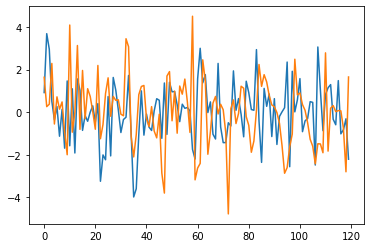

In [34]:
plt.plot(NAO_FOCI.values)
plt.plot(NAO_CESM.values)
plt.show()